In [1]:

/#import all the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score,GridSearchCV,KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore') 

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
submission= pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [4]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [5]:
submission.head()

,id,price
0,54273,39218.443
1,54274,39218.443
2,54275,39218.443
3,54276,39218.443
4,54277,39218.443


In [6]:
print(train.shape)
print(test.shape)

(54273, 13)
(36183, 12)


In [7]:
train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [8]:
test.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')

In [9]:
train.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [10]:
test.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
dtype: object

In [11]:
train.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [12]:
test.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [13]:
train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [14]:
train['brand'].unique()

array(['Ford', 'BMW', 'Jaguar', 'Pontiac', 'Acura', 'Audi', 'GMC',
       'Maserati', 'Chevrolet', 'Porsche', 'Mercedes-Benz', 'Tesla',
       'Lexus', 'Kia', 'Lincoln', 'Dodge', 'Volkswagen', 'Land',
       'Cadillac', 'Mazda', 'RAM', 'Subaru', 'Hyundai', 'MINI', 'Jeep',
       'Honda', 'Hummer', 'Nissan', 'Toyota', 'Volvo', 'Genesis',
       'Mitsubishi', 'Buick', 'INFINITI', 'McLaren', 'Scion',
       'Lamborghini', 'Bentley', 'Suzuki', 'Ferrari', 'Alfa',
       'Rolls-Royce', 'Chrysler', 'Aston', 'Rivian', 'Lotus', 'Saturn',
       'Lucid', 'Mercury', 'Maybach', 'FIAT', 'Plymouth', 'Bugatti'],
      dtype=object)

In [15]:
train['model'].unique()

array(['F-150 Lariat', '335 i', 'XF Luxury', ...,
       'Q4 e-tron Sportback Premium', 'Countryman Cooper', 'S-10 LS'],
      dtype=object)

In [16]:
train['fuel_type'].unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [17]:
train['engine'].unique()

array(['375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
       '300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
       '300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel', ..., '3.0L',
       '3.0 Liter GTDI',
       '120.0HP 2.2L 4 Cylinder Engine Flex Fuel Capability'],
      dtype=object)

In [18]:
train['transmission'].unique()

array(['10-Speed A/T', '6-Speed M/T', '6-Speed A/T',
       'Transmission w/Dual Shift Mode', 'A/T', '5-Speed M/T',
       '7-Speed A/T', '5-Speed A/T', '8-Speed A/T',
       'Transmission Overdrive Switch', '9-Speed Automatic',
       '7-Speed M/T', '10-Speed Automatic', '6-Speed Automatic', 'M/T',
       '5-Speed Automatic', 'CVT Transmission', '9-Speed A/T',
       '8-Speed Automatic', '4-Speed A/T', 'Automatic', '1-Speed A/T',
       '8-Speed Automatic with Auto-Shift', '7-Speed DCT Automatic',
       'Automatic CVT', '7-Speed Automatic',
       '7-Speed Automatic with Auto-Shift', '4-Speed Automatic',
       '6-Speed Automatic with Auto-Shift', '6-Speed Manual',
       '7-Speed Manual',
       '6-Speed Electronically Controlled Automatic with O',
       '1-Speed Automatic', '10-Speed Automatic with Overdrive',
       '8-Speed Manual', '2-Speed A/T', 'CVT-F', '–', 'F',
       '9-Speed Automatic with Auto-Shift', '7-Speed', 'Variable',
       'SCHEDULED FOR OR IN PRODUCTION', '6-Spe

In [19]:
train['ext_col'].unique() 

array(['Blue', 'Black', 'Purple', 'Gray', 'White', 'Red', 'Silver',
       'Summit White', 'Platinum Quartz Metallic', 'Green', 'Orange',
       'Lunar Rock', 'Red Quartz Tintcoat', 'Beige', 'Gold',
       'Jet Black Mica', 'Delmonico Red Pearlcoat', 'Brown',
       'Rich Garnet Metallic', 'Stellar Black Metallic', 'Yellow',
       'Deep Black Pearl Effect', 'Metallic', 'Ice Silver Metallic',
       'Agate Black Metallic', 'Rosso Mars Metallic', 'White Clearcoat',
       'Santorini Black Metallic', 'DB Black Clearcoat',
       'Snowflake White Pearl', 'Glacial White Pearl',
       'Maximum Steel Metallic', 'Blue Caelum', 'Dark Matter Metallic',
       '–', 'Oxford White', 'Cobra Beige Metallic',
       'Velvet Red Pearlcoat', 'Python Green', 'Obsidian Black Metallic',
       'Beluga Black', 'Blue Reflex Mica', 'Sparkling Silver',
       'Black Clearcoat', 'Soul Red Crystal Metallic',
       'Bright White Clearcoat', 'Shimmering Silver',
       'Midnight Black Metallic', 'Cajun Red Tint

In [20]:
train['int_col'].unique()

array(['Gray', 'Black', 'Beige', 'Brown', 'Silver', 'Jet Black', 'Mesa',
       'White', '–', 'Red', 'Blue', 'Medium Stone', 'Ash', 'Ebony',
       'Shara Beige', 'Tan', 'Titan Black / Quarzit', 'Global Black',
       'Orange', 'Saddle Brown', 'Nero Ade', 'Beluga', 'Light Slate',
       'Gold', 'Black Onyx', 'Nougat Brown', 'Camel', 'Hotspur Hide',
       'Charcoal', 'Satin Black', 'Deep Chestnut', 'Diesel Gray / Black',
       'White / Brown', 'AMG Black', 'Parchment', 'Shale',
       'Canberra Beige', 'Sahara Tan', 'Ebony / Pimento', 'Rhapsody Blue',
       'Medium Dark Slate', 'Rioja Red', 'Black / Express Red',
       'Deep Garnet', 'Portland', 'Sandstone', 'Dark Ash', 'Deep Cypress',
       'Black / Stone Grey', 'Chestnut', 'Navy Pier', 'Green',
       'Giallo Taurus / Nero Ade', 'Mistral Gray / Raven', 'Dark Gray',
       'Amber', 'Charles Blue', 'Hotspur', 'Medium Earth Gray', 'Ceramic',
       'Kyalami Orange', 'Charcoal Black', 'Adrenaline Red', 'Walnut',
       'Brandy', 'Bla

In [21]:
train['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [22]:
train['clean_title'].unique()

array(['Yes'], dtype=object)

In [23]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [24]:
"""Let's merge the train and test data and inspect the data type"""
merged = pd.concat([train, test], axis=0, sort=True)
print(merged.dtypes.value_counts())
print('Dimensions of data:', merged.shape)

object     9
int64      3
float64    1
Name: count, dtype: int64
Dimensions of data: (90456, 13)


In [25]:
# First we will combine the train and the test csv files
# We will be including all the rows from the files and columns from MSSubClass till SaleCondition
all_data = pd.concat((train.loc[:,:],
                      test.loc[:,:]))

In [26]:
all_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000.0
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250.0
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000.0
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500.0
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850.0


In [27]:
from sklearn.preprocessing import LabelEncoder 
label_encoders = {}
for column in ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'engine']:
    label_encoders[column] = LabelEncoder()
    all_data[column] = label_encoders[column].fit_transform(all_data[column]) 
    
    

In [28]:
all_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,14,649,2018,74349,2,730,2,28,63,None reported,Yes,11000.0
1,1,4,49,2007,80000,2,544,19,19,12,None reported,Yes,8250.0
2,2,21,1803,2009,91491,2,551,15,194,9,None reported,Yes,15000.0
3,3,4,1779,2022,2437,3,657,45,107,28,None reported,Yes,63500.0
4,4,40,699,2001,111000,2,224,35,263,12,None reported,Yes,7850.0


In [29]:
all_data=all_data.drop(columns=['id'],axis=1)


In [30]:
all_data.dtypes

brand             int32
model             int32
model_year        int64
milage            int64
fuel_type         int32
engine            int32
transmission      int32
ext_col           int32
int_col           int32
accident         object
clean_title      object
price           float64
dtype: object

In [31]:
columns= ['accident']

for column in columns:
    dummies= pd.get_dummies(all_data[column])
    all_data=pd.concat([all_data,dummies],axis=1)

In [32]:
all_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,At least 1 accident or damage reported,None reported
0,14,649,2018,74349,2,730,2,28,63,None reported,Yes,11000.0,False,True
1,4,49,2007,80000,2,544,19,19,12,None reported,Yes,8250.0,False,True
2,21,1803,2009,91491,2,551,15,194,9,None reported,Yes,15000.0,False,True
3,4,1779,2022,2437,3,657,45,107,28,None reported,Yes,63500.0,False,True
4,40,699,2001,111000,2,224,35,263,12,None reported,Yes,7850.0,False,True


In [33]:
all_data['clean_title']=all_data['clean_title'].replace({'Yes':1})

In [34]:
all_data=all_data.drop(columns=['accident'],axis=1)

In [35]:
all_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,clean_title,price,At least 1 accident or damage reported,None reported
0,14,649,2018,74349,2,730,2,28,63,1,11000.0,False,True
1,4,49,2007,80000,2,544,19,19,12,1,8250.0,False,True
2,21,1803,2009,91491,2,551,15,194,9,1,15000.0,False,True
3,4,1779,2022,2437,3,657,45,107,28,1,63500.0,False,True
4,40,699,2001,111000,2,224,35,263,12,1,7850.0,False,True


## Exploratory Data Analysis

In [36]:
all_data.dtypes

brand                                       int32
model                                       int32
model_year                                  int64
milage                                      int64
fuel_type                                   int32
engine                                      int32
transmission                                int32
ext_col                                     int32
int_col                                     int32
clean_title                                 int64
price                                     float64
At least 1 accident or damage reported       bool
None reported                                bool
dtype: object

In [37]:
numerical_data= all_data.select_dtypes(include=['int64','int32', 'float64'])
boolean_data= all_data.select_dtypes(include=['bool'])

In [38]:
numerical_data.describe()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,clean_title,price
count,90456.000000,90456.0000,90456.000000,90456.000000,90456.000000,90456.000000,90456.000000,90456.000000,90456.000000,90456.0,5.427300e+04
mean,21.000774,905.8859,2015.080769,72639.410332,1.994130,575.200241,27.761895,131.734799,27.860208,1.0,3.921844e+04
std,14.947212,553.2690,5.589065,50567.715194,0.490244,266.356832,11.620612,102.584054,32.222809,0.0,7.282634e+04
min,0.000000,0.0000,1974.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000e+03
25%,9.000000,456.0000,2012.000000,32000.000000,2.000000,355.000000,19.000000,19.000000,12.000000,1.0,1.550000e+04
50%,17.000000,840.0000,2016.000000,66000.000000,2.000000,592.000000,29.000000,107.000000,12.000000,1.0,2.800000e+04
75%,35.000000,1407.0000,2019.000000,102000.000000,2.000000,798.000000,35.000000,263.000000,28.000000,1.0,4.500000e+04
max,54.000000,1858.0000,2024.000000,405000.000000,6.000000,1076.000000,47.000000,274.000000,132.000000,1.0,2.954083e+06


In [39]:
numerical_data.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'clean_title', 'price'],
      dtype='object')

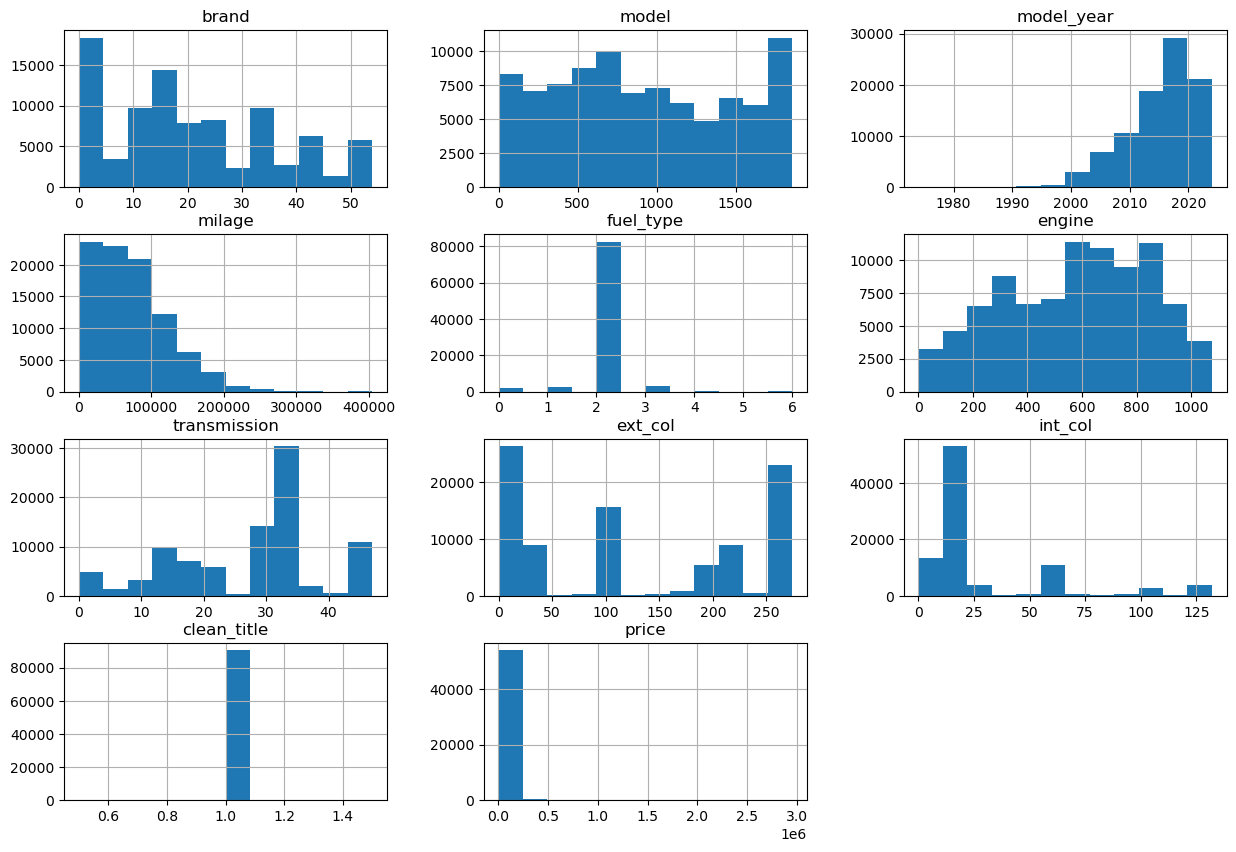

In [40]:
columns= ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'clean_title', 'price']

numerical_data[columns].hist(bins=12, figsize=[15,10]); 

In [41]:
boolean_data.columns

Index(['At least 1 accident or damage reported', 'None reported'], dtype='object')

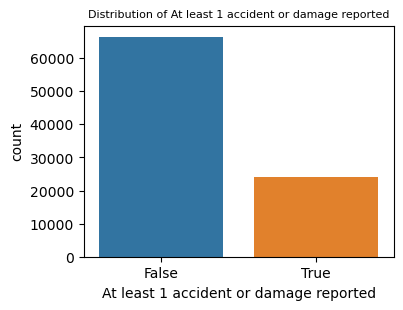

In [42]:
plt.figure(figsize=[4,3])
sns.countplot(data= all_data , x='At least 1 accident or damage reported')
plt.title('Distribution of At least 1 accident or damage reported', fontsize=8); 

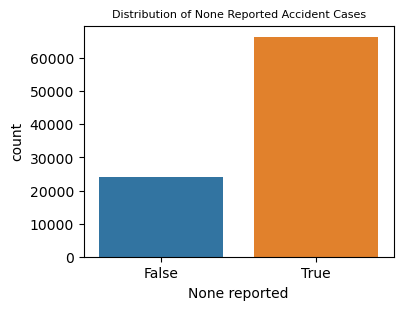

In [43]:
plt.figure(figsize=[4,3])
sns.countplot(data= all_data, x='None reported')
plt.title('Distribution of None Reported Accident Cases', fontsize=8);

<Axes: >

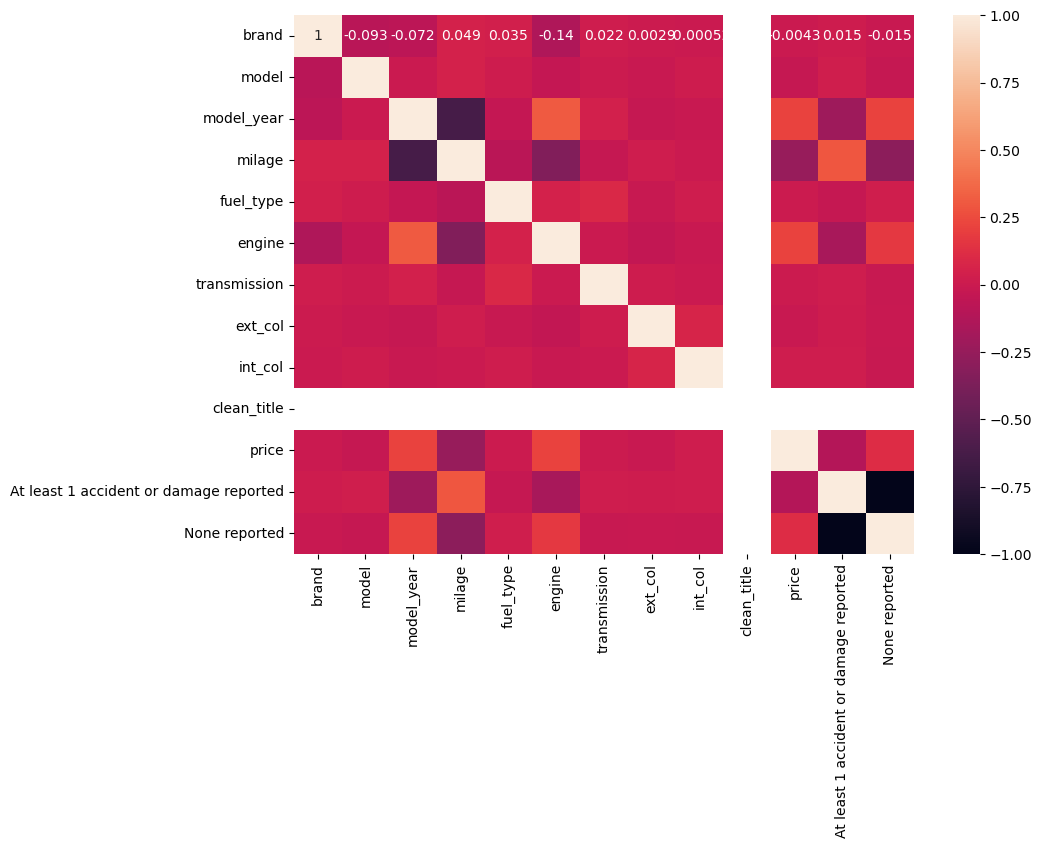

In [44]:
plt.figure(figsize=[10,7])
sns.heatmap(all_data.corr(), annot=True) 

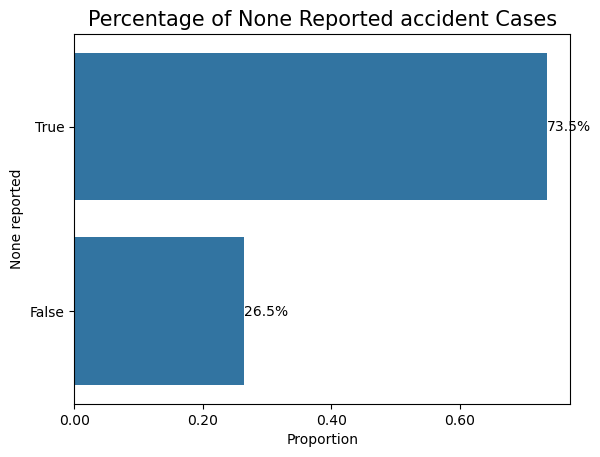

In [45]:
n_reported=all_data['None reported'].value_counts().sum()
max_reported_count=all_data['None reported'].value_counts()[0]
max_reported_prop=max_reported_count/n_reported
tick_props=np.arange(0,max_reported_prop,0.20 )
tick_name=['{:0.2f}'.format(v) for v in tick_props]

base_color=sns.color_palette()[0]
type_order=all_data['None reported'].value_counts().index
sns.countplot(data=all_data, y='None reported', color=base_color, order=type_order)
plt.xticks(tick_props*n_reported, tick_name)
plt.title('Percentage of None Reported accident Cases', fontsize=15);


for i in range(all_data['None reported'].value_counts().shape[0]):
    count=all_data['None reported'].value_counts()[i]
    pct_string='{:0.1f}%'.format(100*count/n_reported)
    plt.text(count+1,i,pct_string, va='center')
    plt.xlabel('Proportion')
    #plt.savefig('image1.png');

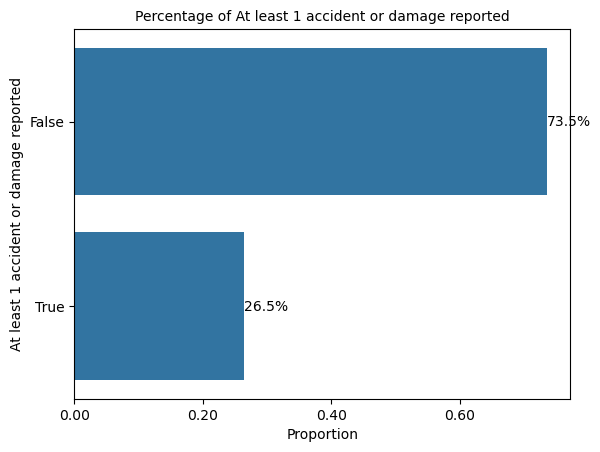

In [46]:
n_damage_reported=all_data['At least 1 accident or damage reported'].value_counts().sum()
max_damage_reporte_count=all_data['At least 1 accident or damage reported'].value_counts()[0]
max_damage_reporte_prop=max_damage_reporte_count/n_damage_reported
tick_props=np.arange(0,max_damage_reporte_prop,0.20 )
tick_name=['{:0.2f}'.format(v) for v in tick_props]

base_color=sns.color_palette()[0]
type_order=all_data['At least 1 accident or damage reported'].value_counts().index
sns.countplot(data=all_data, y='At least 1 accident or damage reported', color=base_color, order=type_order)
plt.xticks(tick_props*n_damage_reported, tick_name)
plt.title('Percentage of At least 1 accident or damage reported', fontsize=10);


for i in range(all_data['At least 1 accident or damage reported'].value_counts().shape[0]):
    count=all_data['At least 1 accident or damage reported'].value_counts()[i]
    pct_string='{:0.1f}%'.format(100*count/n_damage_reported)
    plt.text(count+1,i,pct_string, va='center')
    plt.xlabel('Proportion')
    #plt.savefig('image1.png');

## Feature Engineering and Feature Selection

In [47]:
current_year = 2024
all_data['vehicle_age'] = current_year - all_data['model_year']

# Calculate milage per year
all_data['milage_per_year'] = all_data['milage'] / all_data['vehicle_age']

all_data['fuel_type_age'] = all_data['fuel_type'] * all_data['vehicle_age']


# Create color combination feature
all_data['color_combination'] = all_data['ext_col'] + all_data['int_col']


# Calculate brand-model popularity count
all_data['brand_model'] = all_data['brand']  + all_data['model']
all_data['brand_model_count'] = all_data.groupby('brand_model')['brand_model'].transform('count')



# Create age-engine interaction term
all_data['age_engine_interaction'] = all_data['vehicle_age'] * all_data['engine']

# Drop temporary columns
all_data=all_data.drop(columns=[ 'brand_model'], axis=1)


In [48]:
all_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,clean_title,price,At least 1 accident or damage reported,None reported,vehicle_age,milage_per_year,fuel_type_age,color_combination,brand_model_count,age_engine_interaction
0,14,649,2018,74349,2,730,2,28,63,1,11000.0,False,True,6,12391.500000,12,91,821,4380
1,4,49,2007,80000,2,544,19,19,12,1,8250.0,False,True,17,4705.882353,34,31,458,9248
2,21,1803,2009,91491,2,551,15,194,9,1,15000.0,False,True,15,6099.400000,30,203,33,8265
3,4,1779,2022,2437,3,657,45,107,28,1,63500.0,False,True,2,1218.500000,6,135,308,1314
4,40,699,2001,111000,2,224,35,263,12,1,7850.0,False,True,23,4826.086957,46,275,95,5152


In [49]:
# Check for NaNs
all_data.isnull().sum()

brand                                         0
model                                         0
model_year                                    0
milage                                        0
fuel_type                                     0
engine                                        0
transmission                                  0
ext_col                                       0
int_col                                       0
clean_title                                   0
price                                     36183
At least 1 accident or damage reported        0
None reported                                 0
vehicle_age                                   0
milage_per_year                               0
fuel_type_age                                 0
color_combination                             0
brand_model_count                             0
age_engine_interaction                        0
dtype: int64

In [50]:
# Check for infs
inf_cols =all_data.columns[(all_data == np.inf).any() | (all_data == -np.inf).any()].tolist()
print(f"Columns with Infs: {inf_cols}")

Columns with Infs: ['milage_per_year']


In [51]:
all_data['At least 1 accident or damage reported']=all_data['At least 1 accident or damage reported'].replace({'True':1, 'False':0})
all_data['None reported']=all_data['None reported'].replace({'True':1, 'False':0})
all_data['At least 1 accident or damage reported']=all_data['At least 1 accident or damage reported'].astype('float64')
all_data['None reported']=all_data['None reported'].astype('float64')

In [52]:
all_data.dtypes

brand                                       int32
model                                       int32
model_year                                  int64
milage                                      int64
fuel_type                                   int32
engine                                      int32
transmission                                int32
ext_col                                     int32
int_col                                     int32
clean_title                                 int64
price                                     float64
At least 1 accident or damage reported    float64
None reported                             float64
vehicle_age                                 int64
milage_per_year                           float64
fuel_type_age                               int64
color_combination                           int32
brand_model_count                           int64
age_engine_interaction                      int64
dtype: object

In [53]:
# Identify rows with Inf values
inf_rows = all_data[np.isinf(all_data).any(axis=1)]
print("Rows with Inf values:")
print(inf_rows) 

Rows with Inf values:
       brand  model  model_year  milage  fuel_type  engine  transmission  \
1392       4    954        2024   13102          2     963            45   
7337       4    136        2024    1500          3     657            35   
9847       4   1779        2024    9000          3     746            35   
10831      4    954        2024     124          2     963            22   
11685     31   1247        2024    7000          2     840            35   
...      ...    ...         ...     ...        ...     ...           ...   
33610      4    954        2024   21100          2     963            45   
34316      4    954        2024    3415          2     963            45   
35301      4    954        2024    1500          2     963            45   
35927     41    158        2024   19500          2     873            22   
35986     31    799        2024    1500          2     840            28   

       ext_col  int_col  clean_title     price  \
1392       107 

In [54]:
# Drop rows with NaN values
all_data=all_data.fillna(all_data.median())

In [55]:
all_data = all_data.replace([np.inf, -np.inf], np.nan)

In [56]:
print(all_data.shape)

(90456, 19)


In [57]:
all_data.isnull().sum()

brand                                      0
model                                      0
model_year                                 0
milage                                     0
fuel_type                                  0
engine                                     0
transmission                               0
ext_col                                    0
int_col                                    0
clean_title                                0
price                                      0
At least 1 accident or damage reported     0
None reported                              0
vehicle_age                                0
milage_per_year                           84
fuel_type_age                              0
color_combination                          0
brand_model_count                          0
age_engine_interaction                     0
dtype: int64

In [58]:
all_data=all_data.drop(columns=['fuel_type_age'],axis=1)

In [59]:
columns= ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'clean_title']
from scipy import stats
for cols in columns:
    r,p = stats.pearsonr(all_data[cols], all_data['price'])
    print(r,p)
    

-0.0034426215178869025 0.3004876067588473
-0.02027704296943953 1.0670290102940035e-09
0.16687211469202745 0.0
-0.19128397789905888 0.0
0.0011480309121935702 0.7298868748679156
0.1669488877825584 0.0
0.00035568936176218994 0.9148085623633583
-0.0074155267547235185 0.02572842570025214
0.01654498711977225 6.480238931172192e-07
nan nan


## Modeling

In [60]:
all_data.shape

(90456, 18)

In [61]:
train=all_data.iloc[:train.shape[0],:]
train.shape

(54273, 18)

In [62]:
test=all_data.iloc[train.shape[0]:,:]
test.shape

(36183, 18)

In [63]:
# Ensure test and train have the same columns
assert set(train.columns) == set(test.columns)

In [64]:
test.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'clean_title', 'price',
       'At least 1 accident or damage reported', 'None reported',
       'vehicle_age', 'milage_per_year', 'color_combination',
       'brand_model_count', 'age_engine_interaction'],
      dtype='object')

In [65]:
# Features and target variable
X = train.drop(columns=['price'])
y = train['price']

from sklearn.impute import SimpleImputer
# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)
#X_test_imputed = imputer.transform(test)

# Convert imputed arrays back to DataFrame
X = pd.DataFrame(X_imputed, columns=X.columns)
#X_test = pd.DataFrame(X_test_imputed, columns=test.columns)

In [66]:
# Train/test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_val = scaler.transform(X_val) 

## Model Training and Evaluation

In [68]:
from sklearn.metrics import mean_squared_error

def evaluate_model(model, x, y_true):
    """
    Utility function to print the model performance.
    model: Fitted model
    x: Validation features dataset
    y_true: Validation target values
    """
    predicted = model.predict(x)
    rmse = mean_squared_error(y_true, predicted, squared=False)
    print('RMSE: {:.2f}'.format(rmse))
    print()


In [69]:
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.ensemble import GradientBoostingRegressor
models_dict = {
    'Random Forest': RandomForestRegressor(random_state=0),
    'XGBoost': XGBRegressor(),
    'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Elastic Net' : ElasticNet(),
    'MLP' : MLP(),
    'LR' : LinearRegression(),
    'Ridge' : Ridge()
}

for name, model in models_dict.items():
    model.fit(X_train_scaled, y_train)
    print(f'Performance of "{name}" on Validation set:')
    print('==' * 28)
    evaluate_model(model, X_val, y_val)

Performance of "Random Forest" on Validation set:
RMSE: 54416.26

Performance of "XGBoost" on Validation set:
RMSE: 61741.88

Performance of "Gradient Boost" on Validation set:
RMSE: 52412.10

Performance of "Elastic Net" on Validation set:
RMSE: 49770.66

Performance of "MLP" on Validation set:
RMSE: 48826.05

Performance of "LR" on Validation set:
RMSE: 49388.88

Performance of "Ridge" on Validation set:
RMSE: 49380.98



- Best Models will be Re-used

In [70]:
X.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'clean_title',
       'At least 1 accident or damage reported', 'None reported',
       'vehicle_age', 'milage_per_year', 'color_combination',
       'brand_model_count', 'age_engine_interaction'],
      dtype='object')

In [71]:
test=test.drop(columns=['price'],axis=1)
test.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'clean_title',
       'At least 1 accident or damage reported', 'None reported',
       'vehicle_age', 'milage_per_year', 'color_combination',
       'brand_model_count', 'age_engine_interaction'],
      dtype='object')

In [72]:
assert set(X.columns) == set(test.columns)

In [73]:
X_test_imputed = imputer.transform(test)

In [74]:
X_test= pd.DataFrame(X_test_imputed, columns=test.columns)

In [75]:
# Assuming 'XGBoost' was the best model based on RMSE
best_model_MLP = models_dict['MLP']
best_model_MLP.fit(X, y)  # Train on entire dataset

# Predict on test data
test_predictions = best_model_MLP.predict(X_test) 

In [76]:
rmse= mean_squared_error(test_predictions[0:10855], y_val, squared=False)
print(rmse)  

58913.87702681768


In [77]:
# Prepare submission file
submission['price'] = test_predictions
submission.to_csv('submission_MLP1.csv', index=False)
print(submission.head())

      id         price
0  54273  26119.080246
1  54274  20235.387701
2  54275  28462.425014
3  54276  68638.874102
4  54277  47439.897499


In [78]:
# Assuming 'Ridge' was the best model based on RMSE
best_model_Ridge = models_dict['Ridge']
best_model_Ridge.fit(X, y)  # Train on entire dataset

# Predict on test data
test_predictions = best_model_Ridge.predict(X_test) 

In [79]:
rmse= mean_squared_error(test_predictions[0:10855], y_val, squared=False)
print(rmse) 

58125.16577176774


In [80]:
# Prepare submission file
submission['price'] = test_predictions
submission.to_csv('submission_Ridge1.csv', index=False)
print(submission.head()) 

      id         price
0  54273  36183.088433
1  54274  20355.226473
2  54275  43196.306136
3  54276  69400.932870
4  54277  35973.039432


In [81]:
# Assuming 'XGBoost' was the best model based on RMSE
best_model_LR = models_dict['LR']
best_model_LR.fit(X, y)  # Train on entire dataset

# Predict on test data
test_predictions = best_model_LR.predict(X_test) 

In [82]:
rmse= mean_squared_error(test_predictions[0:10855], y_val, squared=False)
print(rmse) 

58125.17109004442


In [83]:
# Prepare submission file
submission['price'] = test_predictions
submission.to_csv('submission_LR.csv', index=False)
print(submission.head()) 

      id         price
0  54273  36183.160820
1  54274  20355.326359
2  54275  43196.389110
3  54276  69400.716780
4  54277  35972.818061


In [84]:
# Assuming 'XGBoost' was the best model based on RMSE
best_model_ELN = models_dict['Elastic Net']
best_model_ELN.fit(X, y)  # Train on entire dataset

# Predict on test data
test_predictions = best_model_ELN.predict(X_test) 

In [85]:
rmse= mean_squared_error(test_predictions[0:10855], y_val, squared=False)
print(rmse) 

58085.402955539415


In [86]:
# Prepare submission file
submission['price'] = test_predictions
submission.to_csv('submission_ELN.csv', index=False)
print(submission.head())

      id         price
0  54273  35382.441912
1  54274  19216.403524
2  54275  42292.629967
3  54276  71847.781446
4  54277  38407.458021


### HyperParameter Optimization
- MLP is sensitive to feature scaling. Have you normalzied your data?- 
Modify your network structure: add more hidden layers and change number of perceptrons  each layerse- C

change activation function to sigmod/tanh/relu 
- Change learning rate: learning_rate, learning_rate_init. 5. Toggle early_stoppingetc.

In [87]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')  # or specify k
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_selected = selector.transform(X_val) 

In [88]:
#!pip install scikeras

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.regularizers import l2

# Define model
def create_model(units1=32, units2=32, dropout_rate=0.4, optimizer='adam'):
    model = Sequential([
        Dense(units1, activation='relu', input_dim=X_train_selected.shape[1]),
        Dropout(dropout_rate),
        Dense(units2, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# Wrap Keras model
model = KerasRegressor(build_fn=create_model, verbose=0, dropout_rate=0.2, units1=32,units2=32, batch_size=32, epochs=100, optimizer='adam'  )

In [90]:
model_MLP= model.fit(X_train_selected, y_train)

In [91]:
# Evaluate the best model
predictions = model_MLP.predict(X_val_selected)
rmse = mean_squared_error(y_val, predictions, squared=False)
#mae = mean_absolute_error(y_test, predictions)
print(f'MSE: {rmse}')  

MSE: 48380.26793749961


In [92]:
# Extract training history
history_data = model_MLP.history_

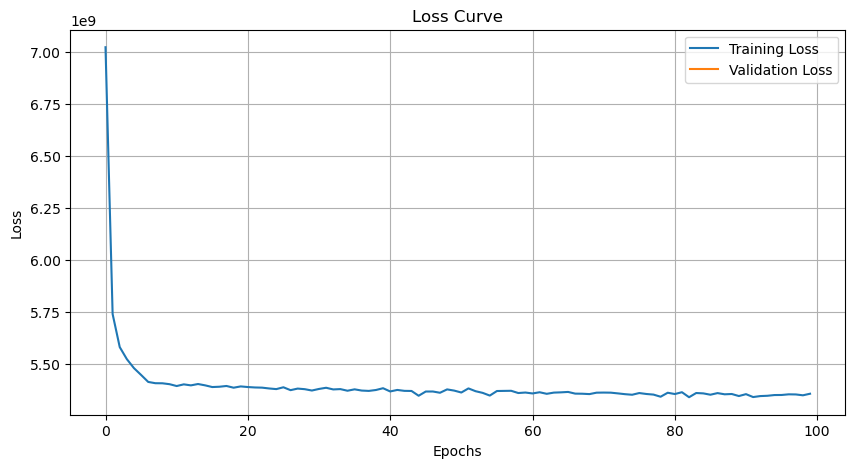

In [93]:
# Plot loss curve
plt.figure(figsize=(10, 5))
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show() 

In [94]:
model_MLP= model.fit(X,y)
# Predict on test data
test_predictions = model_MLP.predict(X_test)  

In [95]:
 # Prepare submission file
submission['price'] = test_predictions
submission.to_csv('submission_optMLP_21.csv', index=False)
print(submission.head()) 

      id         price
0  54273  22554.236328
1  54274  15217.421875
2  54275  22902.953125
3  54276  53952.156250
4  54277  36700.878906


## Using Ensemble Learning Algorithm

In [96]:
from sklearn.ensemble import StackingRegressor 

Training LR...
Training Elastic Net...
Training MLP...
Training GB...
LR RMSE: 49388.88001992593
Elastic Net RMSE: 49480.29348534388
MLP RMSE: 48436.52462395416
GB RMSE: 50753.32476135242

Stacking Ensemble Method Performance Metrics
Stacking RMSE: 48342.001745142334



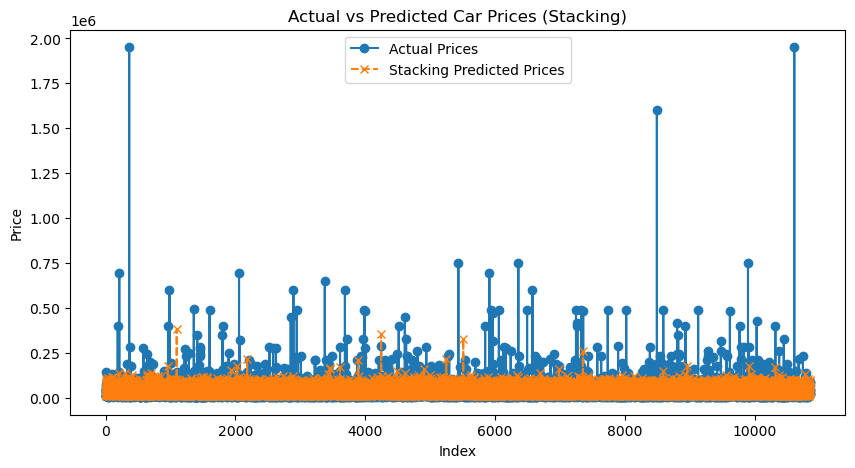

In [110]:
# Example function to create a Keras model
def create_model(dropout_rate=0.44, units1=30, units2=30, optimizer='adam'):
    model = Sequential() 
    model.add(Dense(units1, input_dim = X_train_selected.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units2, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


# Define base models
algorithms = [
    ('LR', LinearRegression(), {}),
    ('Elastic Net', ElasticNet(alpha=0.2, l1_ratio=0.5), {}),
    ('MLP', 
     KerasRegressor(build_fn=create_model, verbose=0, dropout_rate=0.44, units1=30, units2=30, batch_size=30, epochs=100, optimizer='adam'), {}),
    ('GB', GradientBoostingRegressor(learning_rate=0.1, n_estimators=50, alpha=0.01, max_depth=5), {})
]

# Train base models and perform hyperparameter tuning
base_models = {}
for algorithm_name, algorithm, param_grid in algorithms: 
    print(f"Training {algorithm_name}...") 
    if param_grid:
        grid_search = GridSearchCV(algorithm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        model = grid_search.fit(X_train_selected, y_train).best_estimator_
    else:
        model = algorithm
        model.fit(X_train_selected, y_train)
    base_models[algorithm_name] = model

# Evaluate base models
results = []
for algorithm_name, model in base_models.items():
    y_pred = model.predict(X_val_selected)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    results.append({'Algorithm': algorithm_name, 'RMSE': rmse})
    print(f"{algorithm_name} RMSE: {rmse}")

# Ensembling using Stacking
meta_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Fine-tuned meta-model
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model, cv=5)
stacking_model.fit(X_train_selected, y_train)

# Predict and evaluate stacking model
stacking_y_pred = stacking_model.predict(X_val_selected)
stacking_rmse = mean_squared_error(y_val, stacking_y_pred, squared=False)
print(f"\nStacking Ensemble Method Performance Metrics\nStacking RMSE: {stacking_rmse}\n")

# Plotting loss curves (optional)
plt.figure(figsize=(10, 5))
plt.plot(y_val.values, label='Actual Prices', marker='o')
plt.plot(stacking_y_pred, label='Stacking Predicted Prices', linestyle='--', marker='x')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Car Prices (Stacking)')
plt.legend()
plt.show()

In [111]:
stacking= stacking_model.fit(X,y)
#Predict on test data
test_predictions = stacking.predict(X_test)   

In [105]:
# Prepare submission file
submission['price'] = test_predictions
submission.to_csv('submission_stacking5.csv', index=False)
print(submission.head()) 

      id         price
0  54273  27772.372676
1  54274  18124.047594
2  54275  31670.397482
3  54276  67832.324465
4  54277  39307.260627
